In [1]:
import sys 
import os 
import typing as tp 
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import stats
from sklearn.preprocessing import RobustScaler

In [2]:
sys.path.append(os.path.abspath('..'))

In [3]:
base_data_dir: Path = Path('..').resolve() / 'data'
data_dir: Path = base_data_dir / 'models'
plots_dir: Path = base_data_dir / 'plots'
data_dir.exists()

True

In [4]:
result_dfs: list[pd.DataFrame] = []

for mc_fp in (data_dir / 'MonteCarlo').iterdir():
    if mc_fp.suffix == '.mdl':
        continue 
    df: pd.DataFrame = pd.read_csv(mc_fp)
    df['model'] = 'Monte Carlo'
    df['model_num'] = int(str(mc_fp)[-5])
    result_dfs.append(df)
    
for q_fp in (data_dir / 'QAgent').iterdir():
    if q_fp.suffix == '.mdl':
        continue 
    df: pd.DataFrame = pd.read_csv(q_fp)
    df['model'] = 'Q-Learning'
    df['model_num'] = int(str(q_fp)[-5])
    result_dfs.append(df)
    
for s_fp in (data_dir / 'SARSA').iterdir():
    if s_fp.suffix == '.mdl':
        continue 
    df: pd.DataFrame = pd.read_csv(s_fp)
    df['model'] = 'SARSA'
    df['model_num'] = int(str(s_fp)[-5])
    result_dfs.append(df)
result_df: pd.DataFrame = pd.concat(result_dfs)
result_df['model_id'] = result_df[['model', 'model_num']].apply(lambda r: f'{r.model}-{r.model_num}', axis=1)
result_df

,perc_states_visited,total_gain,win_rate,did_win,path_length,episode,model,model_num,model_id
0,0.286550,-10.000000,0.000000,False,226,0,Monte Carlo,6,Monte Carlo-6
1,0.330409,-19.999798,0.000000,False,97,1,Monte Carlo,6,Monte Carlo-6
2,0.342105,-29.999798,0.000000,False,182,2,Monte Carlo,6,Monte Carlo-6
3,0.356725,-39.971165,0.000000,False,50,3,Monte Carlo,6,Monte Carlo-6
4,0.365497,-49.971165,0.000000,False,457,4,Monte Carlo,6,Monte Carlo-6
...,...,...,...,...,...,...,...,...,...
49995,0.818713,-229007.565665,0.955196,True,12,49995,SARSA,5,SARSA-5
49996,0.818713,-229011.335489,0.955197,True,10,49996,SARSA,5,SARSA-5
49997,0.818713,-229015.628330,0.955198,True,11,49997,SARSA,5,SARSA-5
49998,0.818713,-229019.398153,0.955199,True,10,49998,SARSA,5,SARSA-5


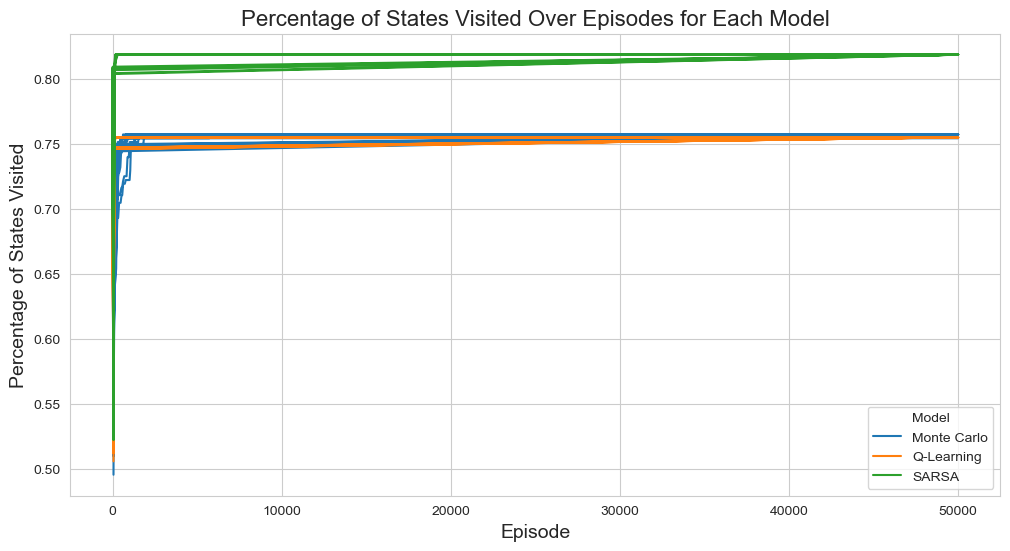

In [9]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create the line plot
plt.figure(figsize=(12, 6))

# Assuming 'episode' is numeric and sorted
for model in result_df['model'].unique():
    model_data = result_df[result_df['model'] == model]
    rolling_data = model_data['perc_states_visited'].rolling(window=50).mean()  # Change the window size as needed
    plt.plot(model_data['episode'], rolling_data, label=model)

# Adding labels and title
plt.title('Percentage of States Visited Over Episodes for Each Model', fontsize=16)
plt.xlabel('Episode', fontsize=14)
plt.ylabel('Percentage of States Visited', fontsize=14)
plt.legend(title='Model')

# Show the plot
plt.show()


/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_70917/1941057649.py:16: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['model', 'model_id', 'phase'], dtype='object')
  rolling_means = result_df[result_df['model'] == model].rolling(window=window_size).mean()


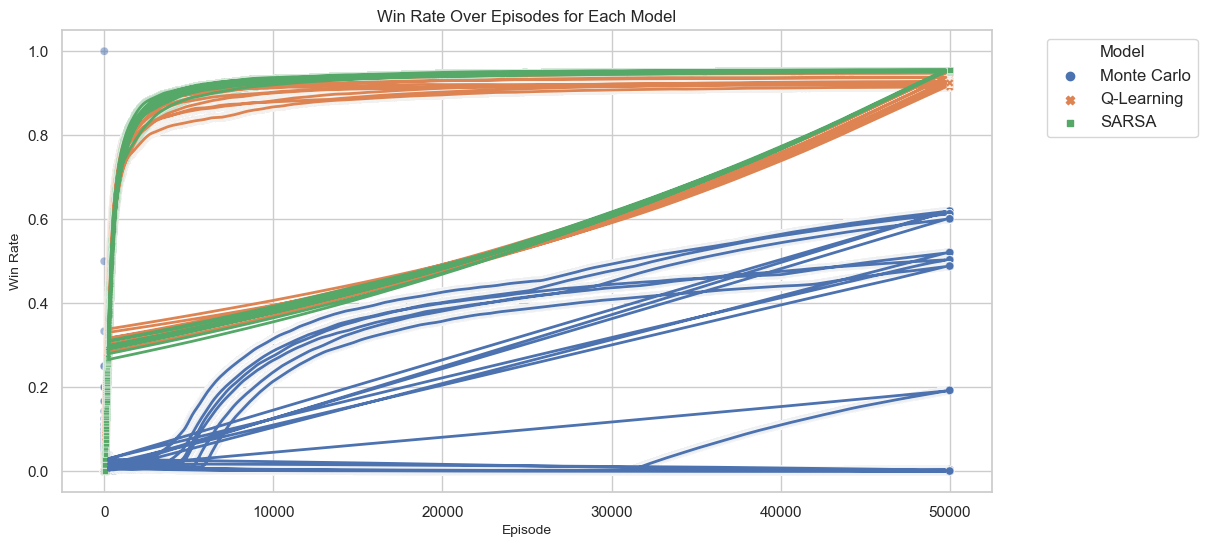

In [31]:
# Set a larger figure size for better visibility
plt.figure(figsize=(12, 6))

# Set the style for a cleaner background
sns.set_style("whitegrid")

# Create the scatter plot with a lower alpha to add transparency
sns.scatterplot(data=result_df, x='episode', y='win_rate', hue='model', style='model', alpha=0.5)

# If desired, add a rolling average for each model
window_size = 500  # Window size for the rolling mean
for model in result_df['model'].unique():
    rolling_means = result_df[result_df['model'] == model].rolling(window=window_size).mean()
    plt.plot(rolling_means['episode'], rolling_means['win_rate'], linewidth=2)

# Set plot title and labels with increased font sizes
plt.title('Win Rate Over Episodes for Each Model', fontsize=12)
plt.xlabel('Episode', fontsize=10)
plt.ylabel('Win Rate', fontsize=10)

# Move the legend to the side of the plot
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)



# Show the plot
plt.show()


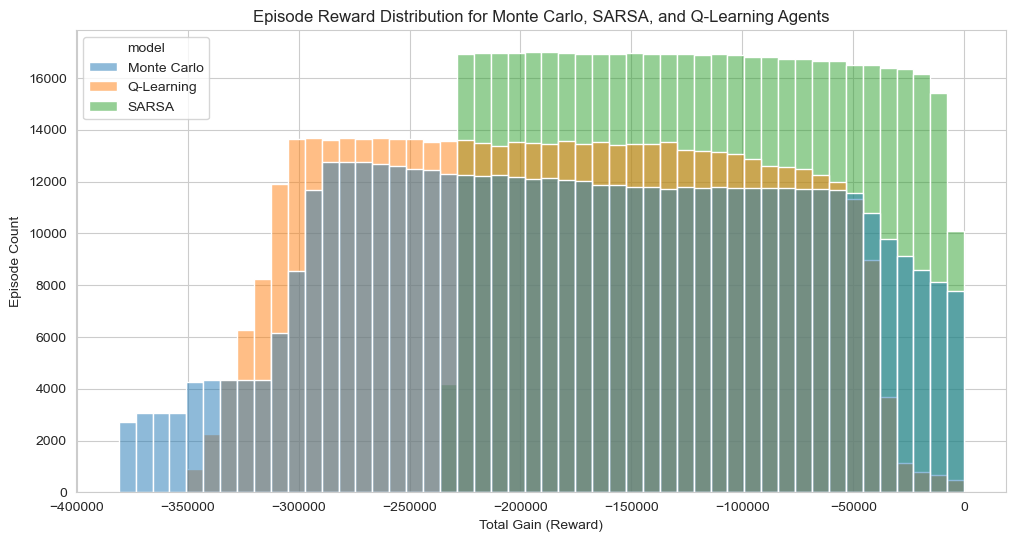

In [11]:
# plotting the distribution of total_gain for each model
plt.figure(figsize=(12, 6))

#  histplot to create the histogram
sns.histplot(data=result_df, x='total_gain', hue='model', bins=50, kde=False, element='bars', stat='count')

plt.title('Episode Reward Distribution for Monte Carlo, SARSA, and Q-Learning Agents')
plt.xlabel('Total Gain (Reward)')
plt.ylabel('Episode Count')

#  the plot
plt.show()


In [ ]:
# convert 'did_win' to numerical values
result_df['win_loss_numeric'] = result_df['did_win'].astype(int)

# calculate cumulative wins for each model over episodes
result_df['cumulative_wins'] = result_df.groupby('model')['win_loss_numeric'].cumsum()



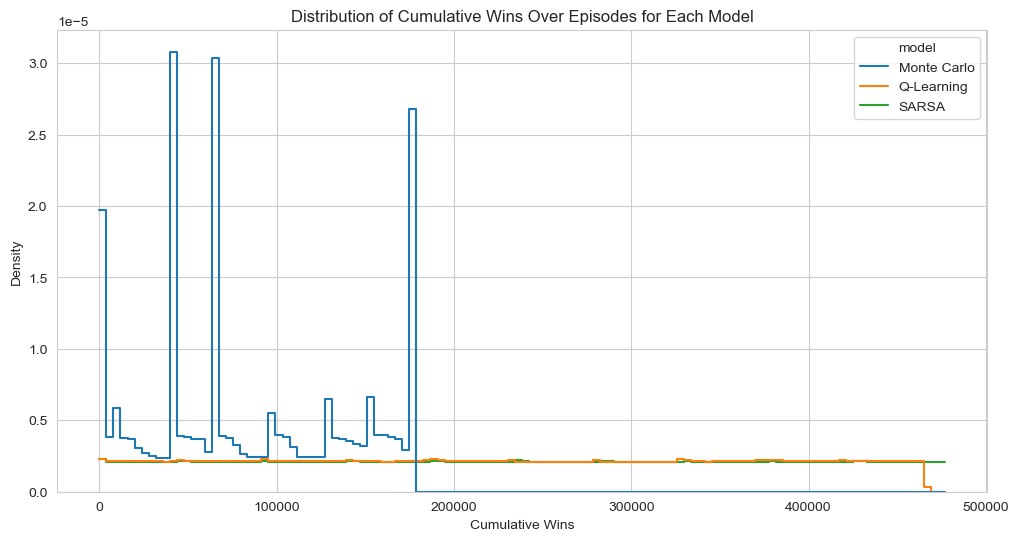

In [12]:
# convert 'did_win' to numerical values
result_df['win_loss_numeric'] = result_df['did_win'].astype(int)

# calculate cumulative wins for each model over episodes
result_df['cumulative_wins'] = result_df.groupby('model')['win_loss_numeric'].cumsum()

sns.set_style('whitegrid')

# histogram of the 'cumulative_wins' column, with separate colors for each model.
plt.figure(figsize=(12, 6))
sns.histplot(data=result_df, x='cumulative_wins', hue='model', element='step', fill=False, common_norm=False, stat='density')

plt.title('Distribution of Cumulative Wins Over Episodes for Each Model')
plt.xlabel('Cumulative Wins')
plt.ylabel('Density')

plt.show()



/Applications/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1138: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


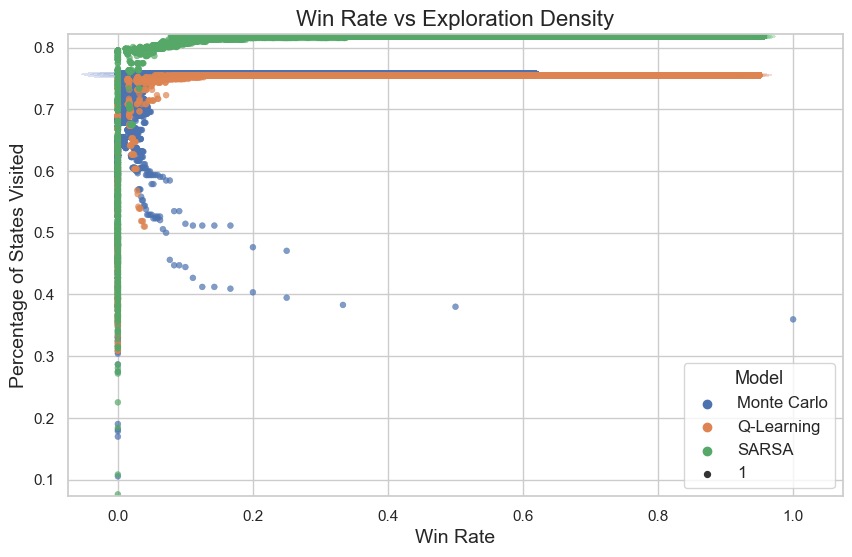

In [33]:
sns.set_style('whitegrid')

# 2D density plot w/o contour lines
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=result_df,
    x='win_rate',
    y='perc_states_visited',
    hue='model',
    fill=True,  # Ensures the area under the density is filled
    # Removed the levels parameter to avoid drawing contour lines
    cmap="mako",  # You can keep the colormap as 'mako' or choose any other
    alpha=0.5  # Controls the transparency of the fill
)

# scatter plot to show individual observations on top of the density plot
sns.scatterplot(
    data=result_df,
    x='win_rate',
    y='perc_states_visited',
    hue='model',
    size=1,
    edgecolor=None,
    alpha=0.7  # Controls the transparency of the scatter points
)

plt.title('Win Rate vs Exploration Density', fontsize=16)
plt.xlabel('Win Rate', fontsize=14)
plt.ylabel('Percentage of States Visited', fontsize=14)
plt.legend(title='Model', fontsize=12, title_fontsize='13')

plt.show()


       perc_states_visited    total_gain      win_rate   path_length  \
count         1.500000e+06  1.500000e+06  1.500000e+06  1.500000e+06   
mean          7.765085e-01 -1.577055e+05  6.881057e-01  1.171376e+01   
std           3.092438e-02  8.706103e+04  3.529923e-01  1.153347e+01   
min           7.602339e-02 -3.811109e+05  0.000000e+00  7.000000e+00   
25%           7.551020e-01 -2.215385e+05  4.336772e-01  1.000000e+01   
50%           7.573099e-01 -1.543258e+05  9.149974e-01  1.000000e+01   
75%           8.187135e-01 -8.606027e+04  9.425429e-01  1.200000e+01   
max           8.187135e-01 -8.999204e+00  1.000000e+00  1.640000e+03   

            episode     model_num  win_loss_numeric  cumulative_wins  
count  1.500000e+06  1.500000e+06      1.500000e+06     1.500000e+06  
mean   2.499950e+04  4.500000e+00      7.463387e-01     1.852667e+05  
std    1.443376e+04  2.872282e+00      4.351062e-01     1.359103e+05  
min    0.000000e+00  0.000000e+00      0.000000e+00     0.000000e+0

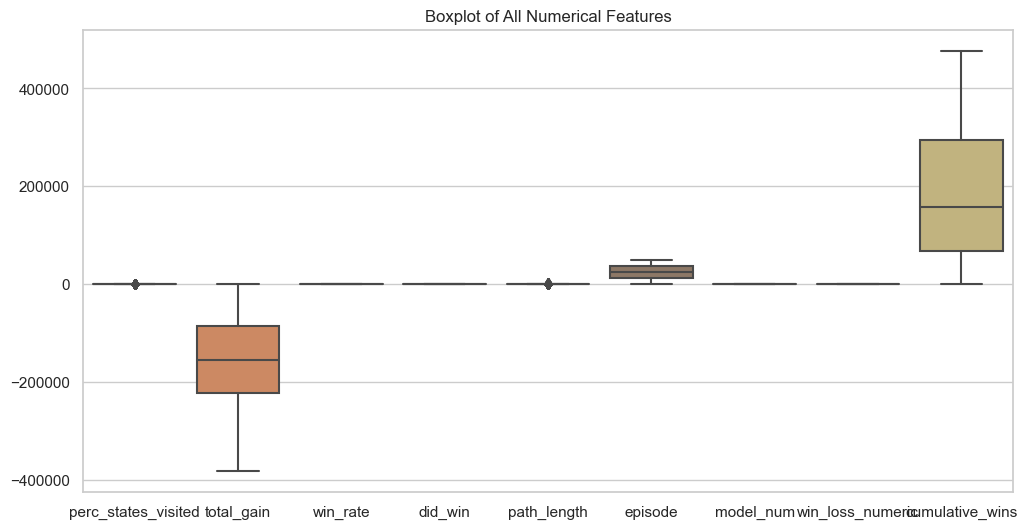

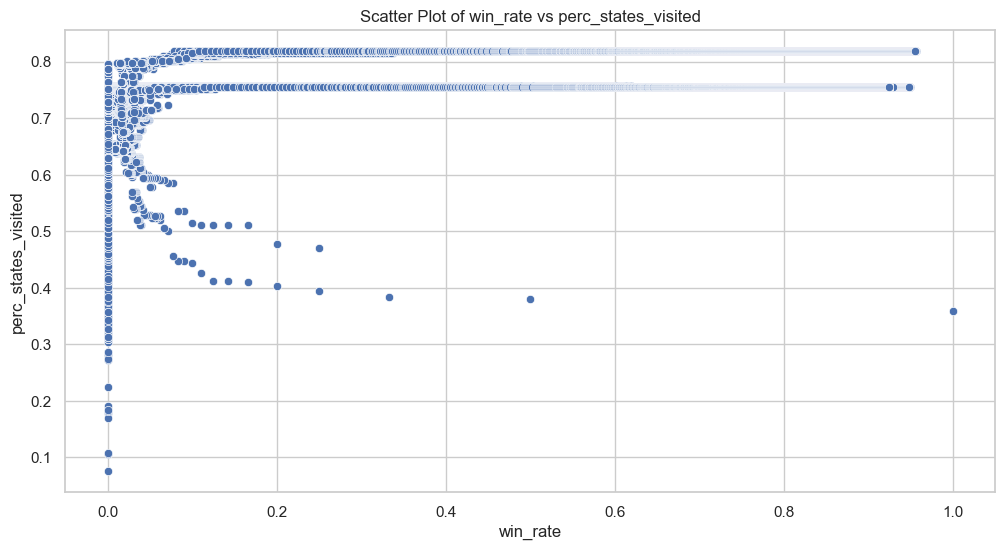

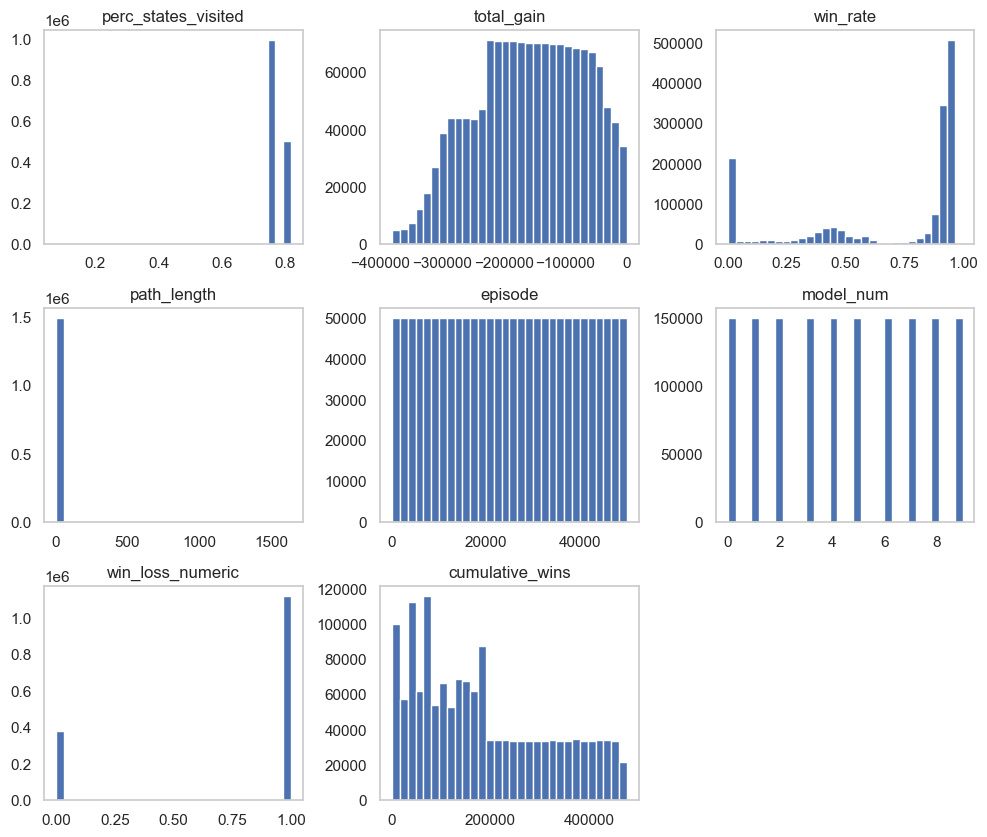

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_stats/counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_stats/counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


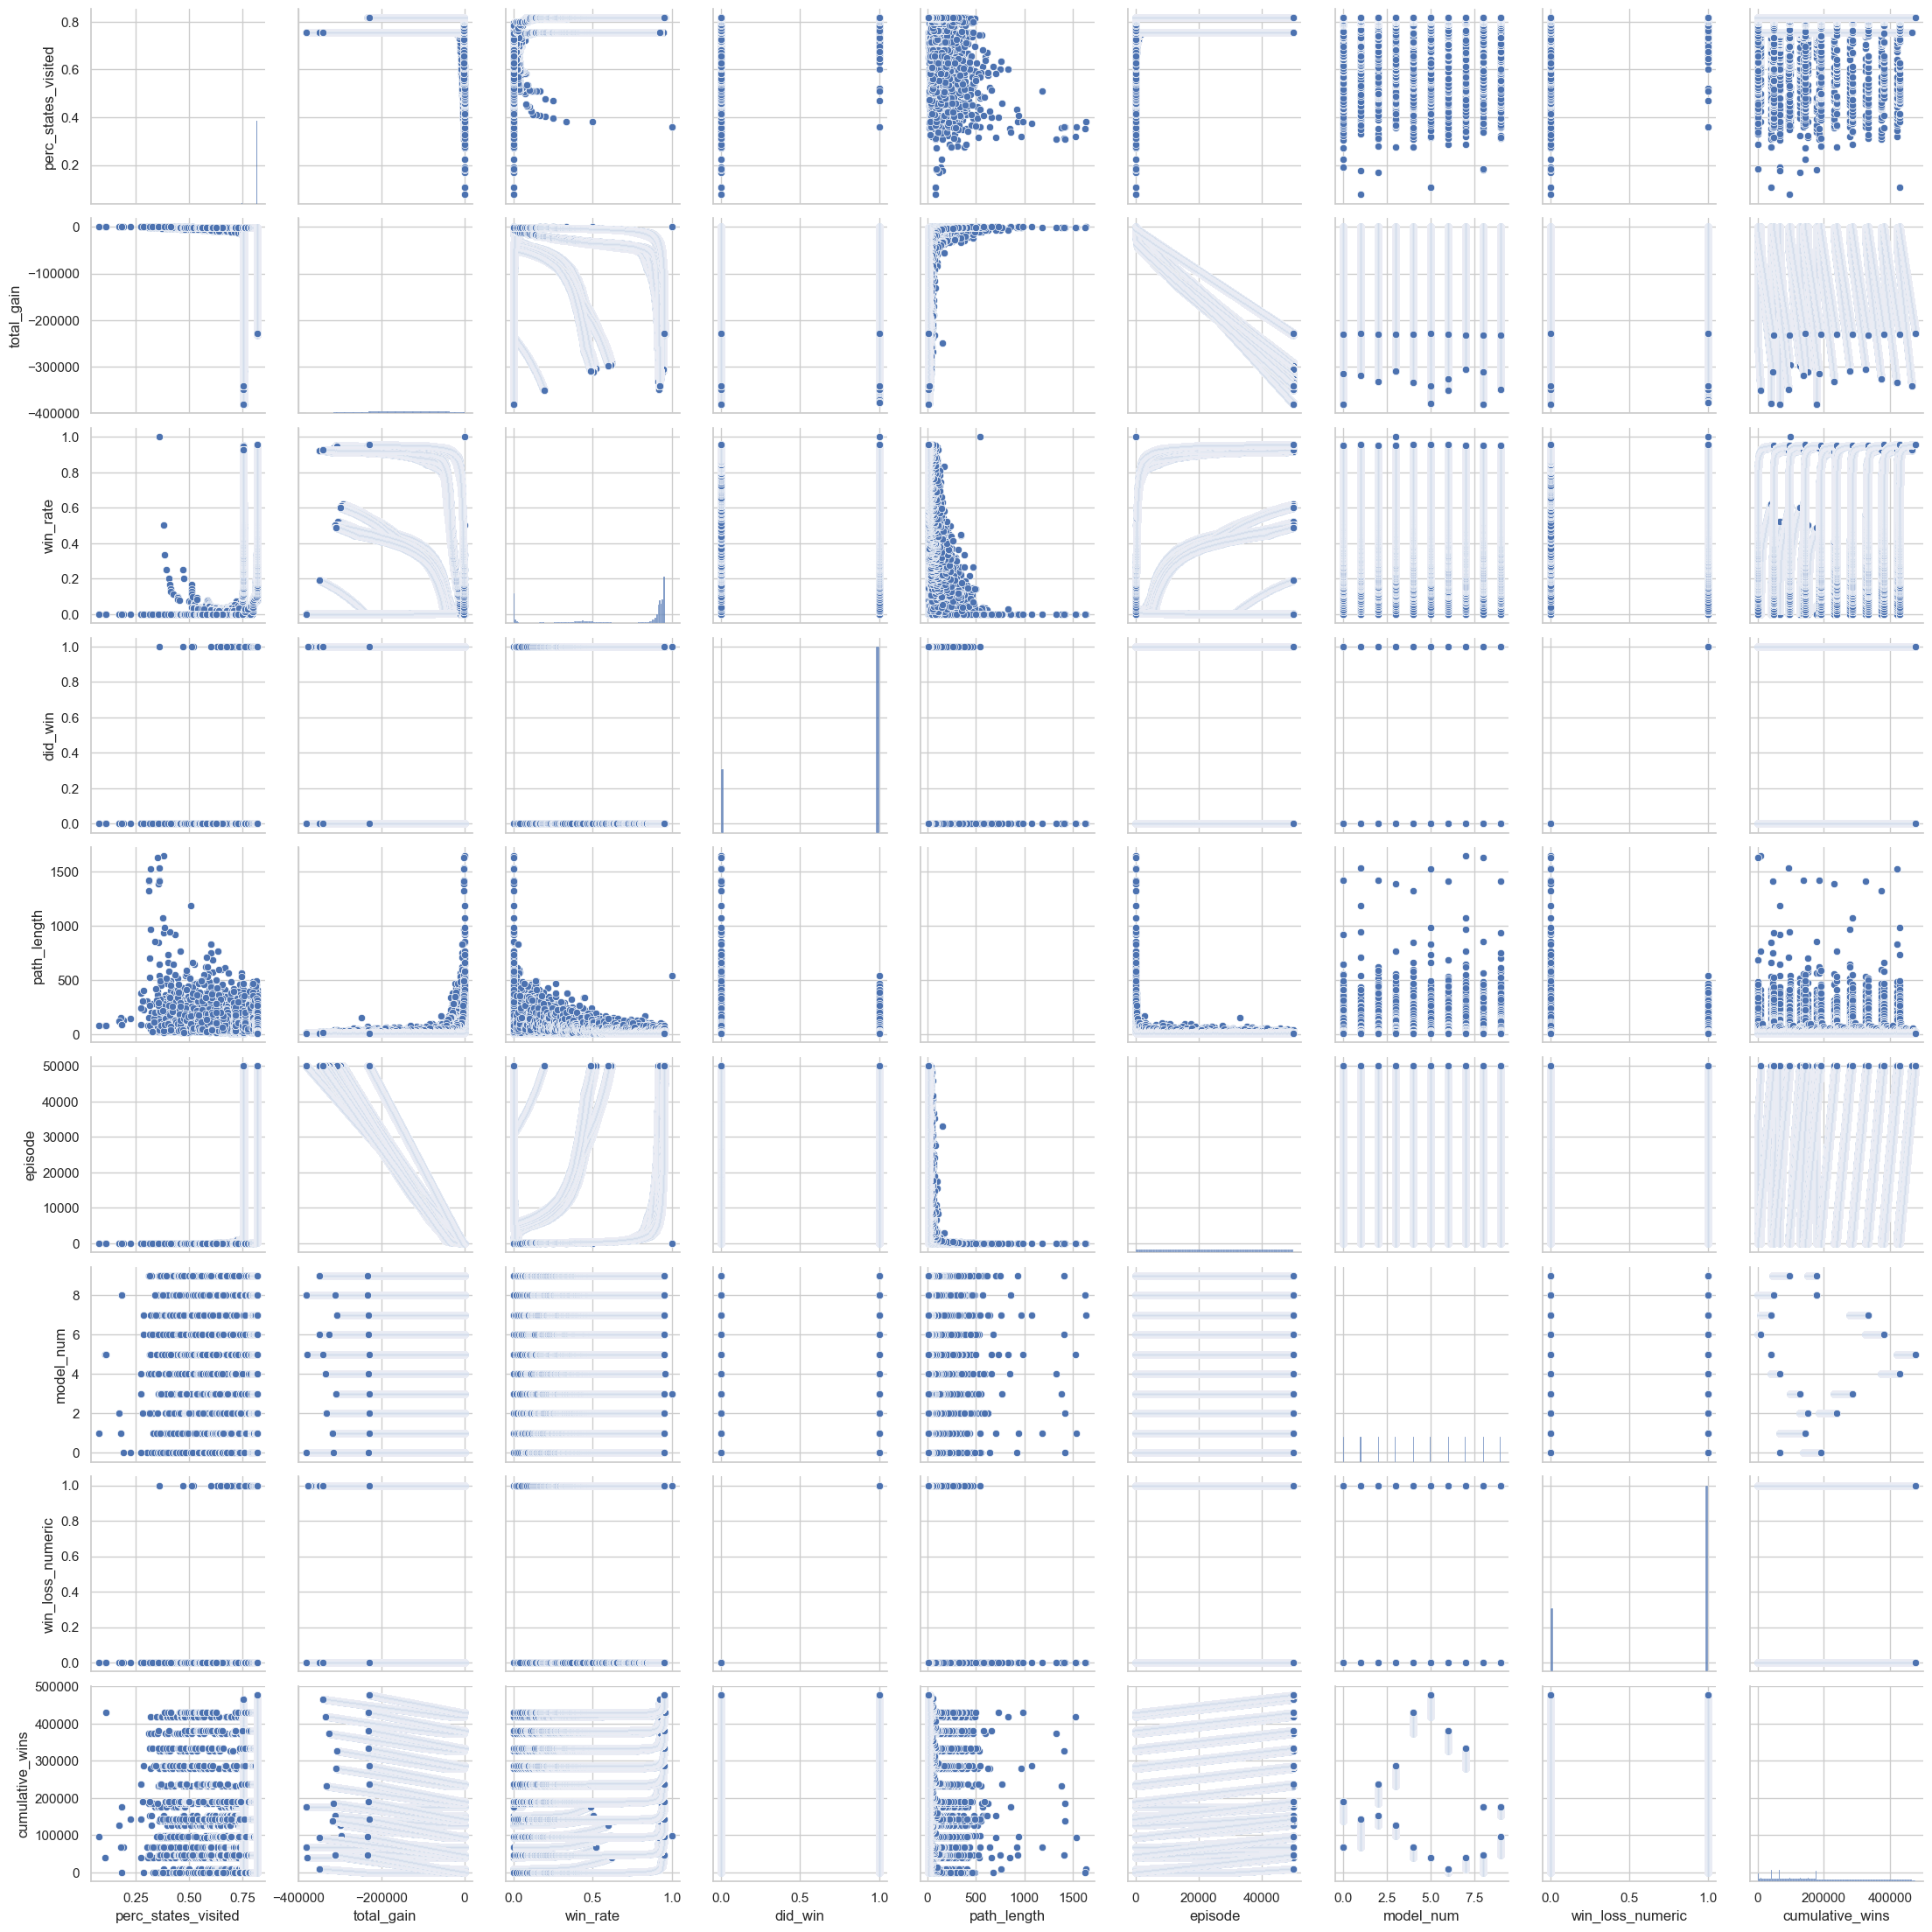

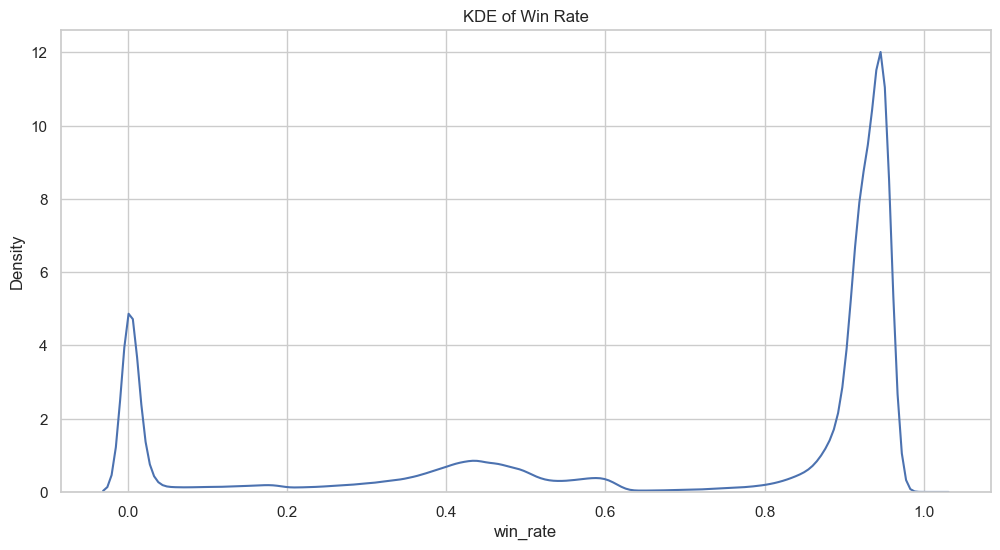

In [25]:
# summary Statistics
print(result_df.describe())

# boxplots for all numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=result_df)
plt.title('Boxplot of All Numerical Features')
plt.show()

# scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=result_df, x='win_rate', y='perc_states_visited')
plt.title('Scatter Plot of win_rate vs perc_states_visited')
plt.show()

# histograms for all numerical features
result_df.hist(bins=30, figsize=(12, 10), grid=False)
plt.show()

# pair Plot
sns.pairplot(result_df)
plt.show()

# KDE Plots
plt.figure(figsize=(12, 6))
sns.kdeplot(data=result_df, x='win_rate', bw_adjust=bw_adjust_value)
plt.title('KDE of Win Rate')
plt.show()


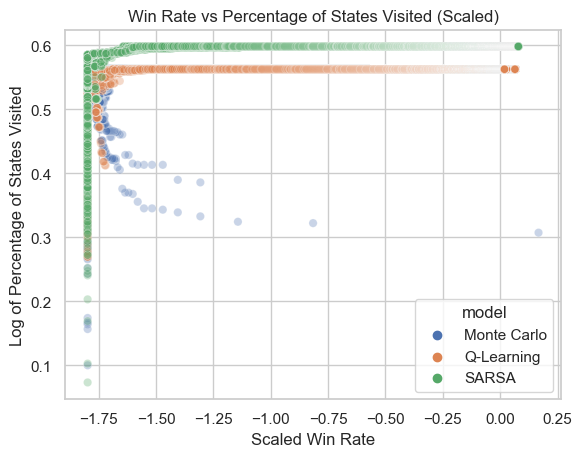

In [26]:
from sklearn.preprocessing import RobustScaler
import numpy as np

win_rate = result_df['win_rate'].values.reshape(-1, 1)
perc_visited = result_df['perc_states_visited'].values.reshape(-1, 1)

# RobustScaler to handle outliers
scaler = RobustScaler()
result_df['scaled_win_rate'] = scaler.fit_transform(win_rate)
result_df['log_perc_visited'] = np.log(perc_visited + 1)  # log transform, +1 to handle zero values

# visualize w/ adjusted scales
sns.scatterplot(data=result_df, x='scaled_win_rate', y='log_perc_visited', hue='model', alpha=0.3)
plt.title('Win Rate vs Percentage of States Visited (Scaled)')
plt.xlabel('Scaled Win Rate')
plt.ylabel('Log of Percentage of States Visited')
plt.show()


In [ ]:
sns.set_style('whitegrid')

# histogram of the 'cumulative_wins' column, with separate colors for each model.
plt.figure(figsize=(12, 6))
sns.histplot(data=result_df, x='cumulative_wins', hue='model', element='step', fill=False, common_norm=False, stat='density')

plt.title('Distribution of Cumulative Wins Over Episodes for Each Model')
plt.xlabel('Cumulative Wins')
plt.ylabel('Density')

plt.show()

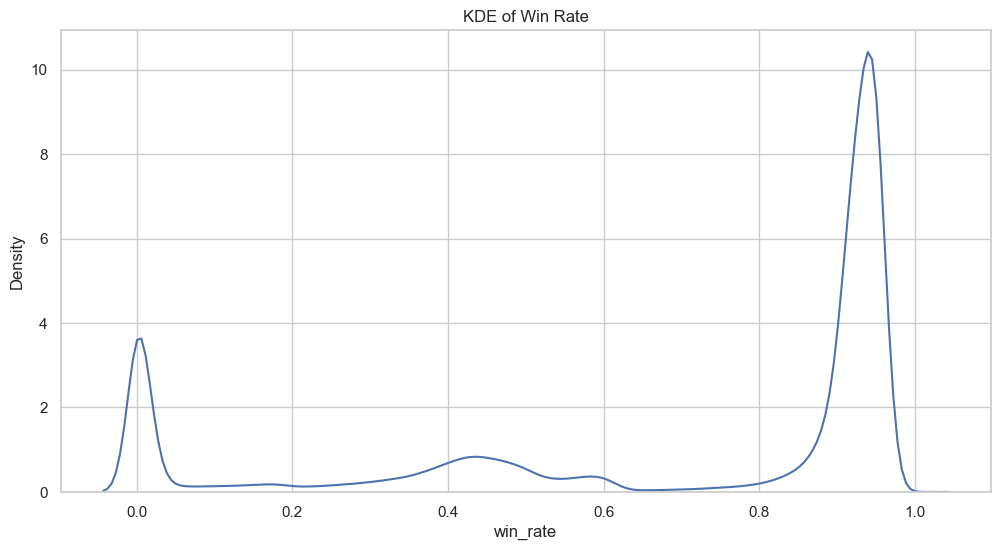

In [32]:
# KDE Plots
plt.figure(figsize=(12, 6))
sns.kdeplot(data=result_df, x='win_rate', bw_adjust=bw_adjust_value)
plt.title('KDE of Win Rate')
plt.show()


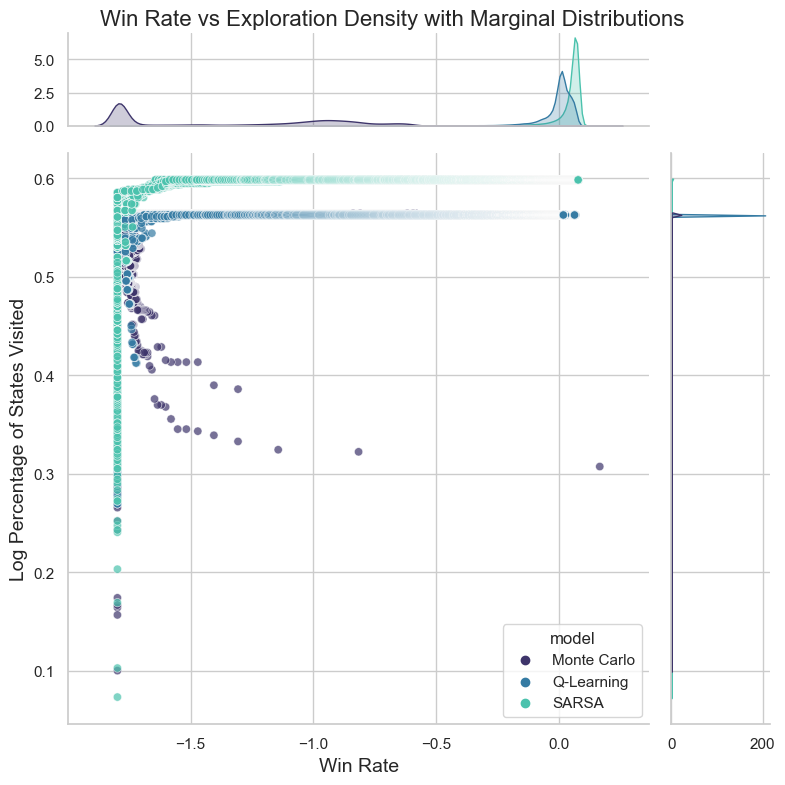

In [29]:
g = sns.jointplot(
    data=result_df,
    x='scaled_win_rate',
    y='log_perc_visited',
    hue='model',
    kind='scatter',  # Changing from 'kde' to 'scatter'
    space=0,
    palette='mako',
    height=8,
    marginal_ticks=True,
    alpha=0.7
)

g.fig.suptitle('Win Rate vs Exploration Density with Marginal Distributions', fontsize=16)
g.set_axis_labels('Win Rate', 'Log Percentage of States Visited', fontsize=14)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95)

plt.show()


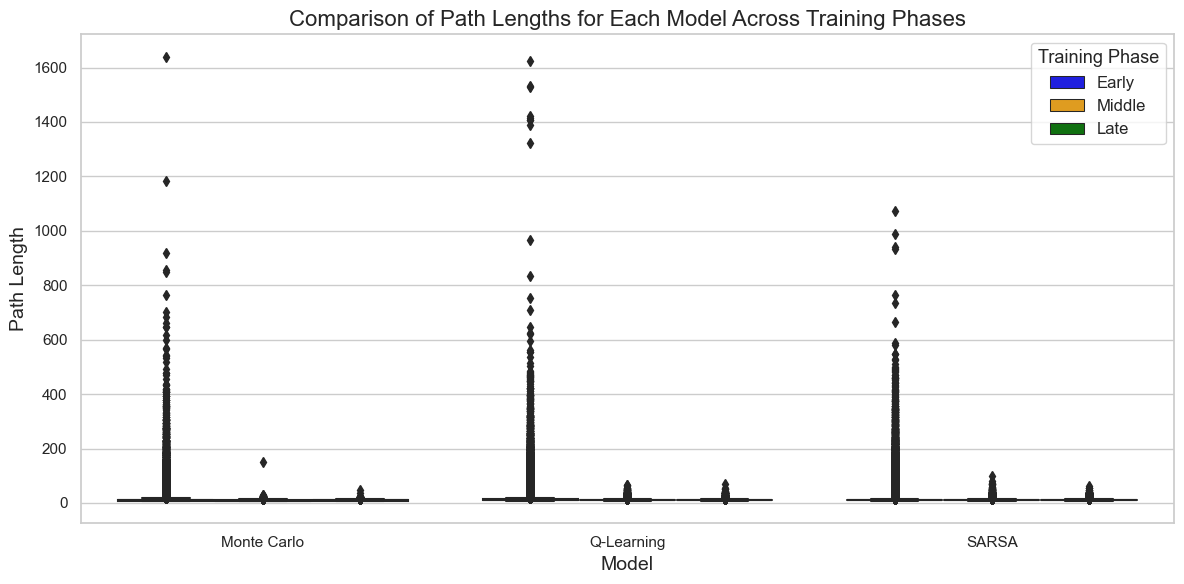

In [22]:
# define  boundaries of  training phases
NUM_EPISODES = 50000
early_phase_end = NUM_EPISODES // 3
middle_phase_end = 2 * NUM_EPISODES // 3

# 'phase' column based on  boundaries
result_df['phase'] = pd.cut(result_df['episode'], 
                            bins=[-1, early_phase_end, middle_phase_end, NUM_EPISODES],
                            labels=['Early', 'Middle', 'Late'])
result_df['phase'] = result_df['phase'].astype('category')

sns.set_style('whitegrid')

# boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=result_df, x='model', y='path_length', hue='phase')
sns.set_palette("pastel")

#  plot with titles and labels
plt.title('Comparison of Path Lengths for Each Model Across Training Phases', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Path Length', fontsize=14)

# legend readability
plt.legend(title='Training Phase', title_fontsize='13', fontsize='12')

#  handle legend
plt.tight_layout()

# Display
plt.show()


In [37]:
# # calculate KDE for each 'model'
# density_values = []
# for model in result_df['model'].unique():
#     model_data = result_df[result_df['model'] == model]
#     density = stats.kde.gaussian_kde(model_data[['win_rate', 'perc_states_visited']].T)
#     density_values.extend(density(model_data[['win_rate', 'perc_states_visited']].T))

# # use the density values to determine the levels
# min_density = min(density_values)
# max_density = max(density_values)
# level_values = np.linspace(start=min_density, stop=max_density, num=100)  # Or any other number you prefer


/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_70917/1573504557.py:5: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  density = stats.kde.gaussian_kde(model_data[['win_rate', 'perc_states_visited']].T)
/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_70917/1573504557.py:5: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  density = stats.kde.gaussian_kde(model_data[['win_rate', 'perc_states_visited']].T)
/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_70917/1573504557.py:5: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  density = stats.kde.gaussian_kde(model_data[['win_rate', 'perc_states_visited']].T)


In [51]:
# # density values to determine the levels
# min_density = min(density_values)
# max_density = max(density_values)
# level_values2 = np.linspace(start=min_density, stop=max_density, num=1500000)  # Or any other number you prefer


In [59]:
# level_values.size

1500000

In [65]:
# level_values44.size

1500000

In [64]:
# #normalize the density values to be between 0 and 1
# density_values_normalized = (density_values - min(density_values)) / (max(density_values) - min(density_values))

# # generate levels from the normalized densities
# level_values44 = np.linspace(start=min(density_values_normalized), stop=max(density_values_normalized), num=1500000)


/Applications/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1138: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='win_rate', ylabel='perc_states_visited'>

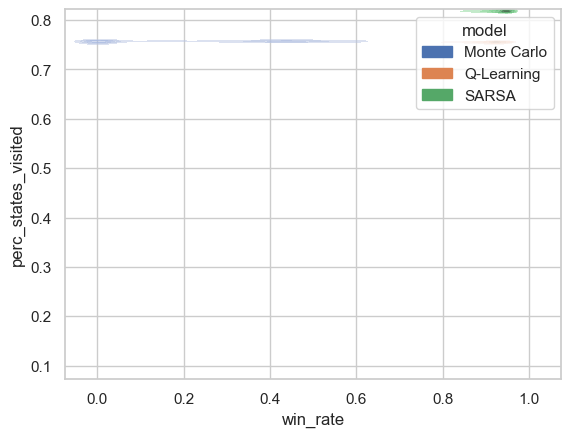

In [68]:
"""
bogus -- don't use --> was trying to get this thing to work
"""

sns.kdeplot(
    data=result_df,
    x='win_rate',
    y='perc_states_visited',
    hue='model',
    fill=True, 
    cmap="mako",
    alpha=0.5
)


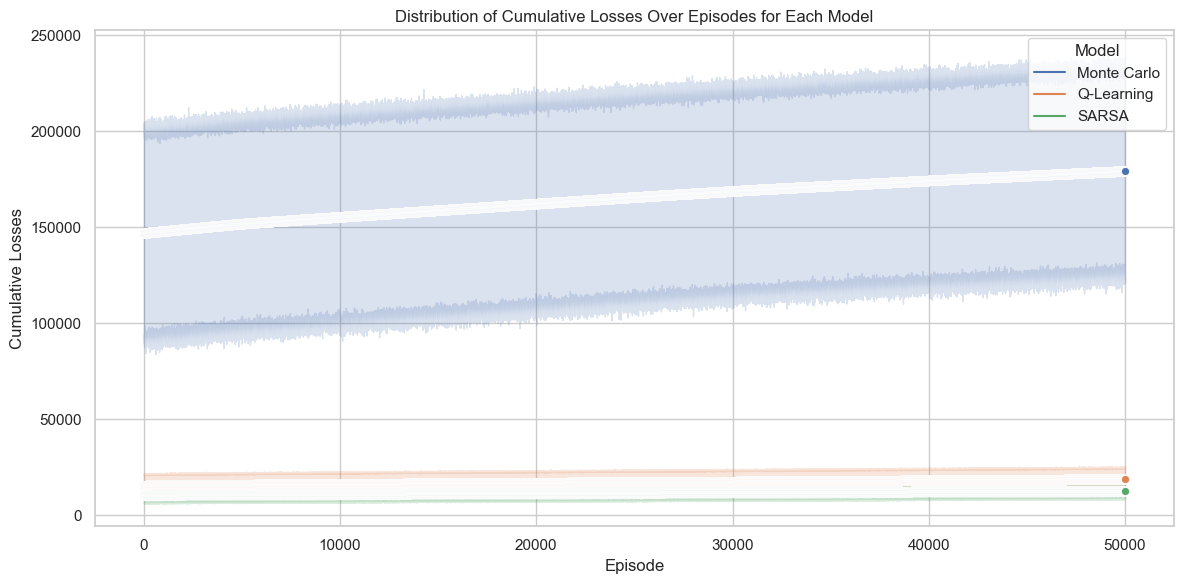

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# convert 'did_win' to numerical values for wins (1) and losses (0)
result_df['win_loss_numeric'] = result_df['did_win'].astype(int)

# calculate cumulative wins for each model over episodes
result_df['cumulative_wins'] = result_df.groupby('model')['win_loss_numeric'].cumsum()

# invert the 'did_win' to represent losses (1 for loss, 0 for win)
result_df['loss_numeric'] = (~result_df['did_win']).astype(int)

# calculate cumulative losses for each model over episodes
result_df['cumulative_losses'] = result_df.groupby('model')['loss_numeric'].cumsum()


In [ ]:
# aesthetic style of the plots
sns.set_style('whitegrid')

# plot for cumulative losses
plt.figure(figsize=(12, 6))
sns.lineplot(data=result_df, x='episode', y='cumulative_wins', hue='model', marker='o')

# titles and labels
plt.title('Distribution of Cumulative Wins Over Episodes for Each Model')
plt.xlabel('Episode')
plt.ylabel('Cumulative Wins')

# plot with a legend
plt.legend(title='Model')
plt.tight_layout()  # ensure  legend doesn't overlap with the plot
plt.show()

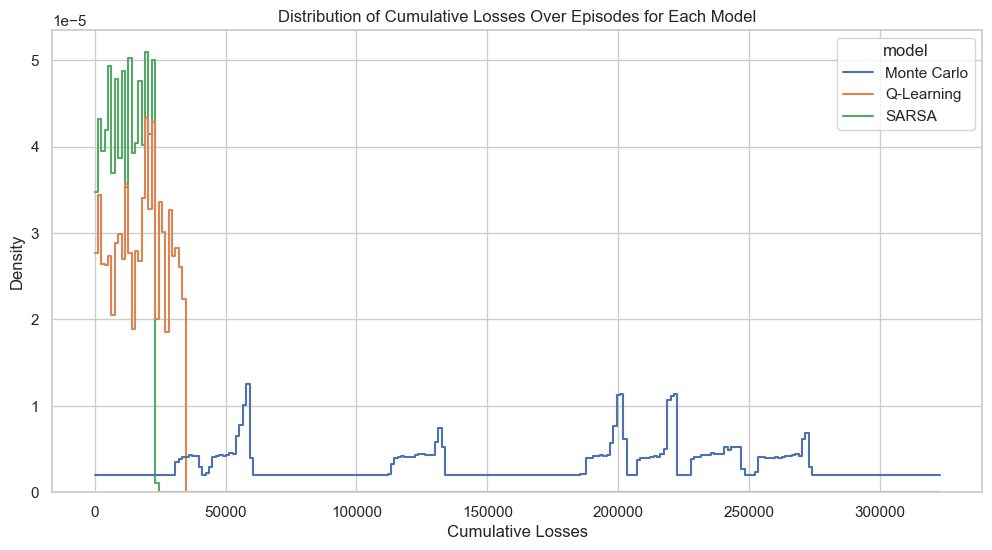

In [71]:
sns.set_style('whitegrid')

# histogram of the 'cumulative_wins' column, with separate colors for each model.
plt.figure(figsize=(12, 6))
sns.histplot(data=result_df, x='cumulative_losses', hue='model', element='step', fill=False, common_norm=False, stat='density')

# titles and labels
plt.title('Distribution of Cumulative Losses Over Episodes for Each Model')
plt.xlabel('Cumulative Losses')
plt.ylabel('Density')

# Display 
plt.show()

